# Project 2 - Decision Trees

- **Algorithm**: step-by-step instructions for the computer to follow. 
    - An ML (Machine Learning) algorithm provides steps for the computer to become an AI.
- **Function**: block of code that carries a specific task. 
    - E.g. `print()`, `plt.show()`, etc.
    - A new function is defined using `def`, followed by a name with curved brackets `()` afterwards.
    - **parameters**: variables that are expected when defining a function
        ```py
        def add_two(num): # num is a parameter
            return num+2 # returns the calculation to be then further processed
        ```
    - A defined function is called using the name with curved brackets afterwards.
    - **arguments**: values passed when calling the function
        ```py
        print(add_two(61)) # 61 is an arguement - prints out the number 63
        ```
    - **procedures**: functions which return nothing.
        ```py
        def add_2(num):
            print(num+2) # no return statement, but prints out the sum
        ``` 

- **Decision Tree**: diagram that helps a computer make decisions by asking a series of questions, usually answered with "yes" or "no", until a final choice is reached.
    - E.g. Did the student go to classes?
        - **yes** -> They pass the exam.
        - **no** -> They fail the exam.
    - Used in video games for story progression (e.g. Mass Effect, Legend of Zelda) and winning matches (e.g. Chess, Go)
    - Used in medical systems to help diagnose illnesses based on symptoms (e.g. NHS app)
    - Below is an example of a decision tree, this diagram is specifically called a dichotomous key.

    ![dkey](Pictures/project_2/dichotomous_keys.png)

- **Classifiers**: type of AI model that categorises data into different groups or classes based on what it has learned.
    - E.g. A classifier can look at a photo and decide whether it shows a cat or a dog.
        - A cat usually has pointed ears, a shorter snout, whiskers, sharp eyes.
        - A dog usually has floppy ears, a longer snout, thicker fur, rounded eyes.
    - Used in CCTV (closed circuit television) security cameras to recognise faces.
    - Used in Social Media to detect inappropriate content.
- **Decision Tree Classifier**: using decision trees to determine classes.
    - Below is an example of a simple decision tree classifier for astronomical objects.
    
    ![dtree](Pictures/project_2/dtree_celestial_bodies.jpg)

In [1]:
from sklearn.datasets import make_blobs # helps produce a dataset
# sklearn - scientific toolkit learning library, stores the necessary tools for building AI
import matplotlib.pyplot as plt
import numpy as np # numerical python library, handles multiples numbers

from sklearn.tree import DecisionTreeClassifier # ML algorithm
from sk_visualisation_helpers import visualize_tree, plot_with_tree # functions to help display the trees

from sklearn.metrics import ConfusionMatrixDisplay # displays how good the AI model is

In [2]:
X, y = make_blobs(
    # X - all of the input information, in this case: (x,y) coordinates
    # y - the classes for the points in X; stores the cluster number for each point of X
    n_samples = 10000,  # how many datapoints - individual bits of information
    centers = 10, # how many clusters/groups
    cluster_std = 0.5, # cluster standard deviation - how wide each group should be
    random_state = 42 # number to store and reproduce the same random values, 42 is standard
    )

In [3]:
print(f"X has shape:{np.shape(X)}, y has shape:{np.shape(y)}") #  display the number of rows and columns
print()
print(X) # has two columns
print()
print(y) # has one column, so it is printed as a single line - like a list

X has shape:(10000, 2), y has shape:(10000,)

[[-3.84988399  0.60256099]
 [ 5.12003123  2.2044115 ]
 [-3.98744852  1.40680811]
 ...
 [-2.8338364   8.40231599]
 [ 1.75156373  4.11044842]
 [-2.83451891  8.77072344]]

[8 1 8 ... 0 4 0]


- **Graph**: visual representation of information; shows data.
    - e.g. Bar chart, line, scatter, pie charts, pictograms, etc.
- **Scatter Graph**: graph which displays dots/crosses to show if there is a connection between two different sets of information
    - **Correlation**: connection between two or more sets of data.
        - **Strong**: there is a clear connection, i.e. *as x increases, y decreases*.
        - **Weak**: the connection is not too clear.
        - **No correlation**: when the data is all over the place.
        - **Positive**: dots go up from the bottom-left to the top-right.
        - **Negative**: dots go down from the top-left to the bottom-right.
        - **Line of best fit**: line that best represents the overall trend in the data.

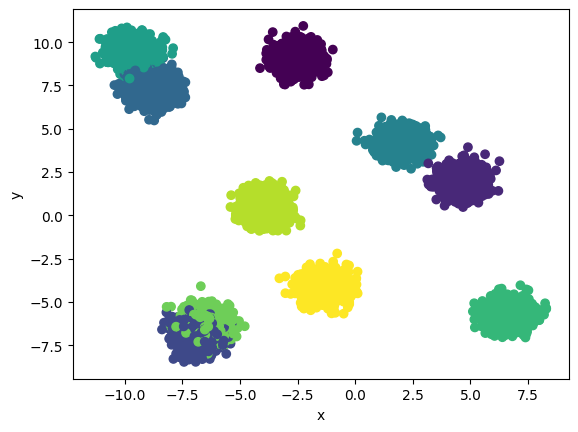

In [4]:
plt.scatter(
    x = X[:, 0], # x-axis
    y = X[:, 1], # y-axis
    c = y # colours according to the labels from y
    )
plt.xlabel('x') # set axis labels
plt.ylabel('y')
plt.show() 


### Problem
There are many white spaces across the graph, which makes it difficult to tell what group the new data would belong to when they are in those spaces, e.g. (-10.0, 0.0).

### Solution
Use a decision tree classifier to segment (separate/split) the graph into 10 sections according to the data present - which it learns from.

---

# Decision Tree

- **Root**: where the initial split is; the very first question asked by the AI.
    - top layer of the tree.
- **Branch**: answer from a question above, leading to a decision/result/another question.
- **Nodes**: questions/decisions made in the middle layers.
- **Leaf**: the class or final decision/result the tree concludes to.
    - final layer of the tree, no more layers beyond it.
    - `max_leaf_nodes`: the maximum number of classes/final decisions/results to exist from the decision tree.
- **Depth**: the number of layers in a decision, which determines how complex the tree is.
    - the final layer (leaf layer) does not count towards the depth.
    - `max_depth`: maximum number of layers in a decision tree; maximum number of questions the AI can ask.

- **Criterion**: rule or formula used to decide the best place to split the data at each node; measure how pure or mixed the classes are after a split.
- **Gini impurity**: a measurement of how mixed up a group of data is.
    - The value is a probability (chance) between 0.0 and 1.0.
    - lower = better: data is pure and organised.
    - higher = worse: data is chaotic and random.
- **Entropy**: a measurement on uncertainty or disorder within a node.
    - lower = higher purity.
    - higher = higher disorder.

In [ ]:
classifier = DecisionTreeClassifier(
    criterion = "gini", ### EXTRA
    splitter= "best", ### EXTRA
    max_depth = 5, # maximum number of questions
    max_leaf_nodes = 10 # maximum number of final answers
)

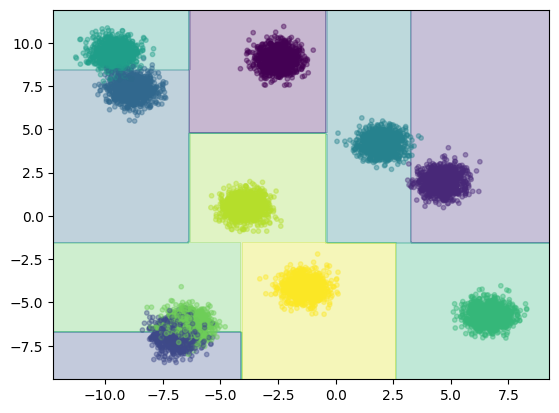

In [6]:
visualize_tree(classifier, X, y, boundaries=False)

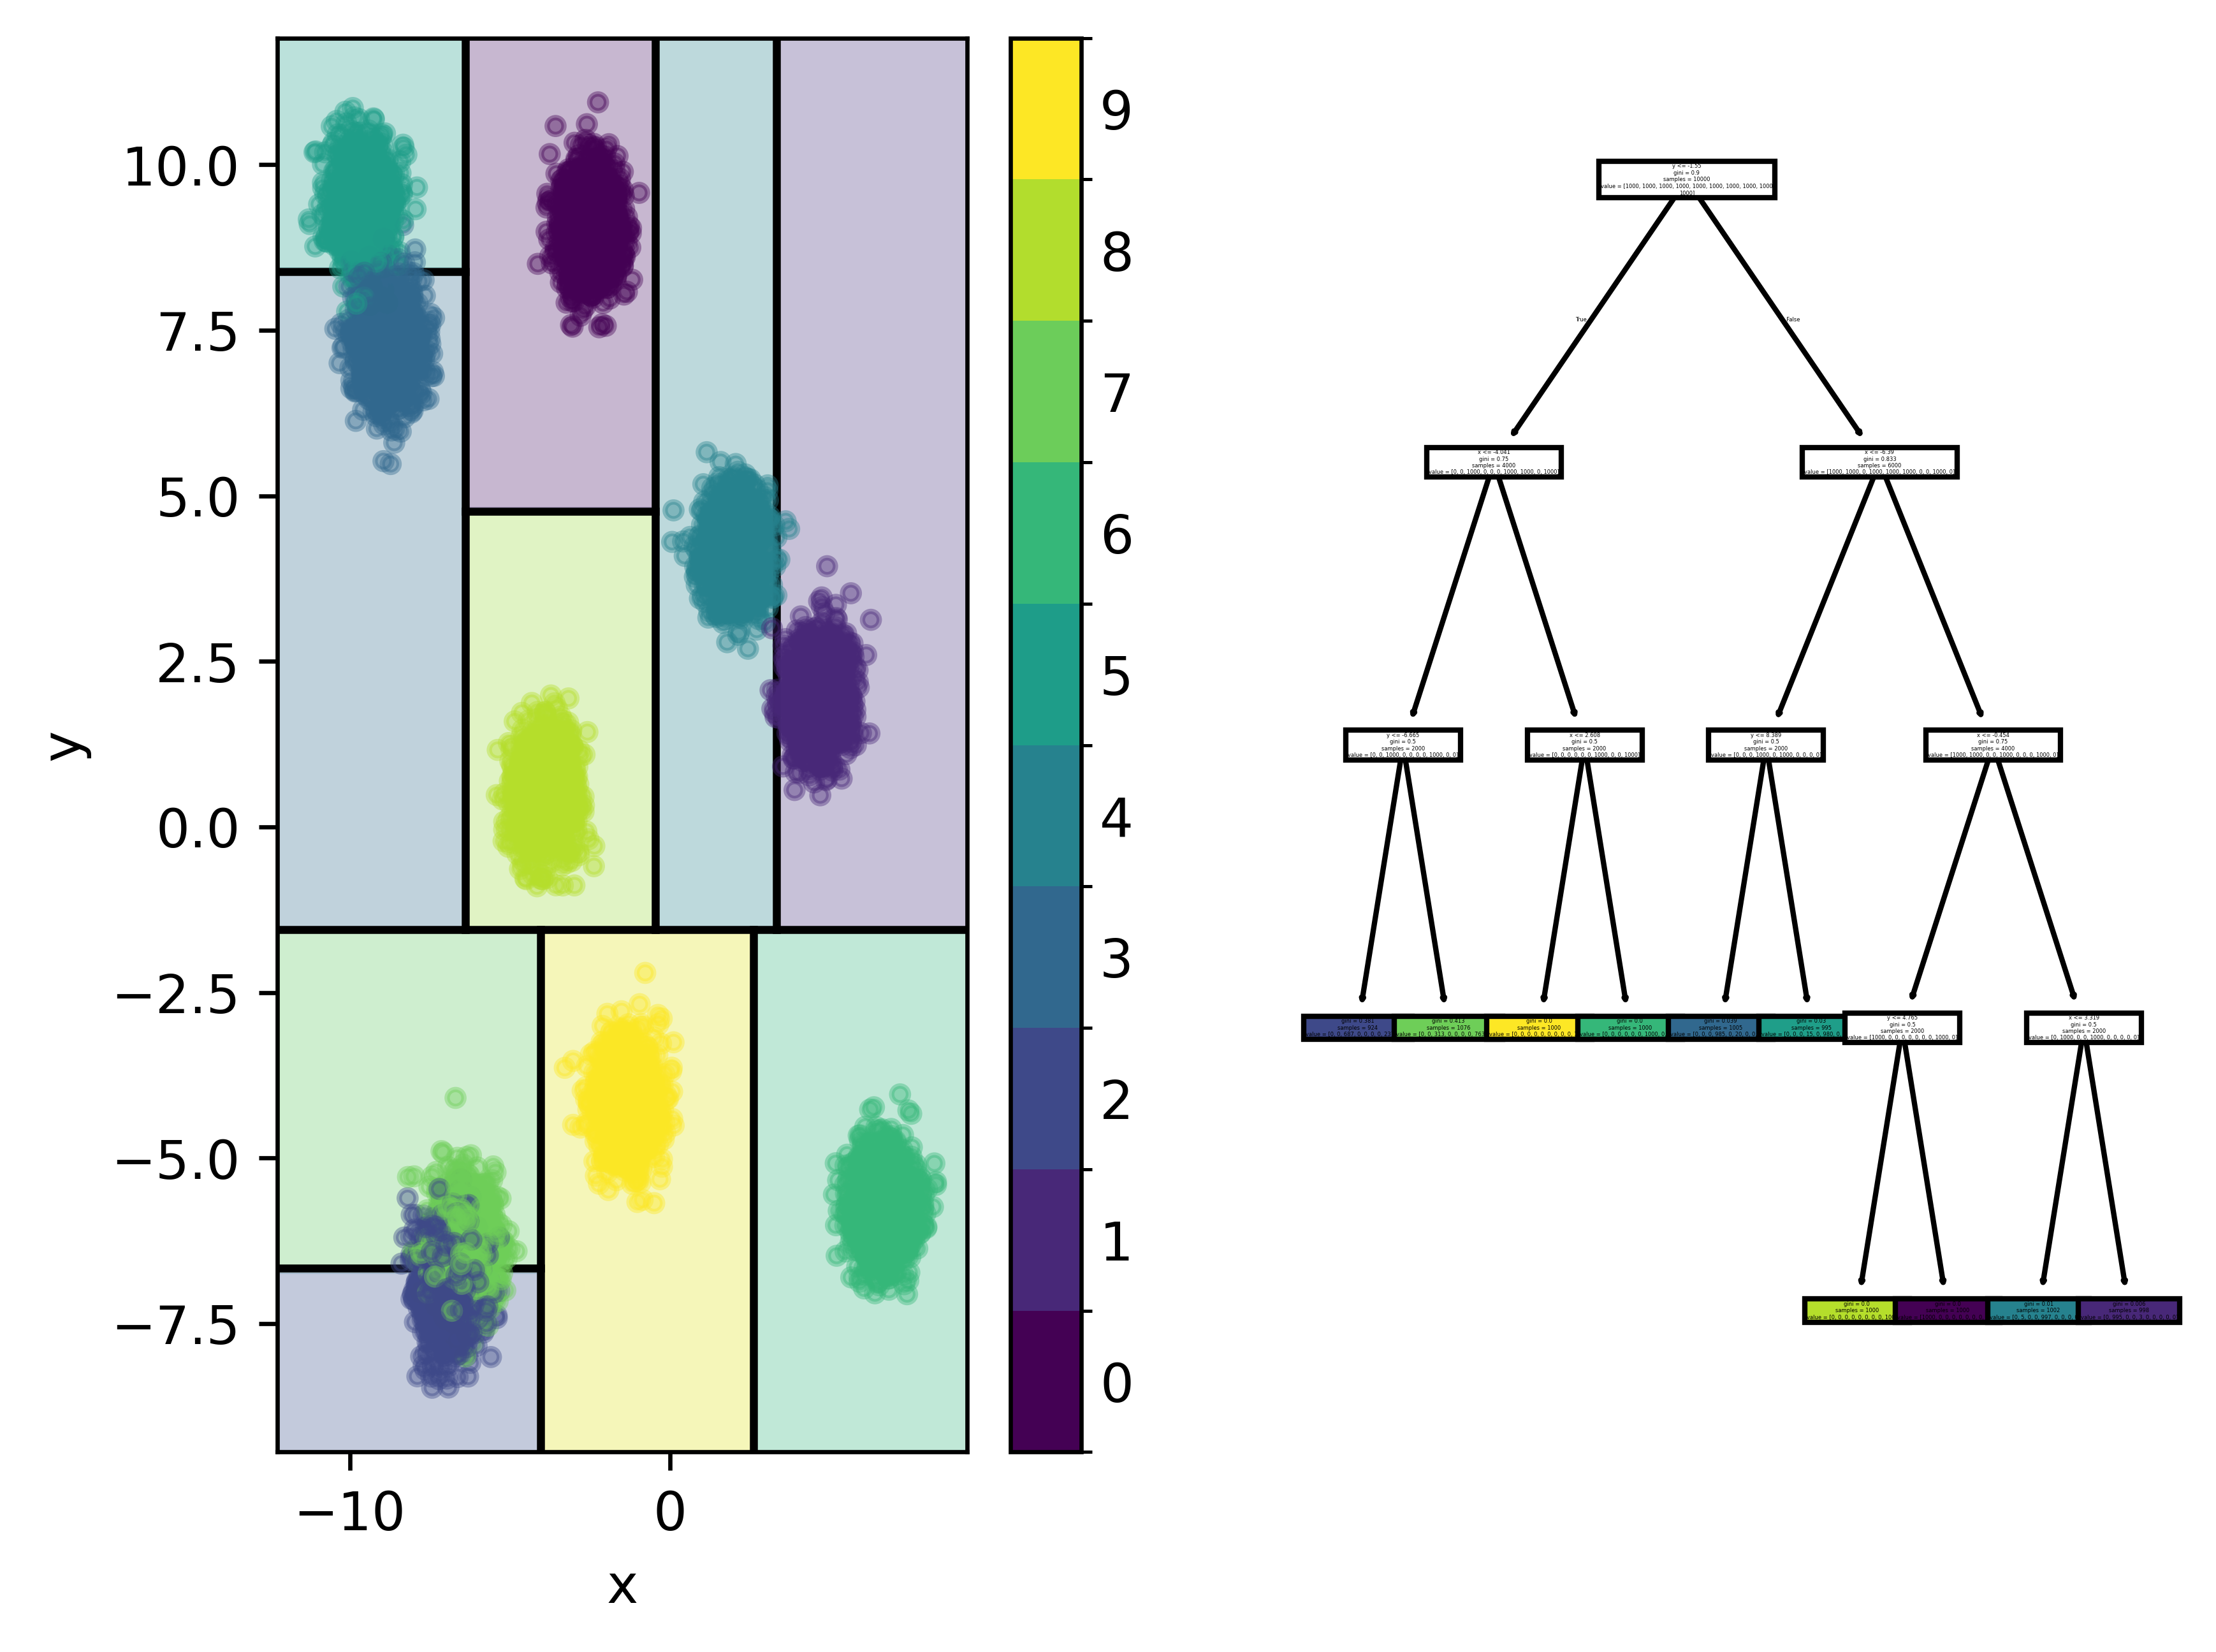

In [7]:
plot_with_tree(classifier, X, y, boundaries=True)

- **Dataset**: collection of information used for training the AI
    - **Feature**: measured input (data into the code) used by a model
        - in this case, the features are the x and y coordinates
    -  **Label/Target**: the value to predict.
        - in this case, the labels are the colours of the plots, i.e. purple, cyan, green, etc. seen as numbers, i.e. 0, 1, 2, etc.

- **AI model**: computer program that learns from data to make decisions, recognise patterns or predict outcomes.
    - When making an AI model, data is split between two sets:
        - **Training set**: main data used to teach the AI to recognise patterns. Usually 80% of the original dataset.
        - **Testing set**: small section of the dataset used to evaluate how good the AI is. Usually the remaining 20% of the dataset.

In [8]:
X_train, y_train  = make_blobs(n_samples = 17671, centers = 7, 
                               cluster_std=0.571, random_state=42)
X_test, y_test = make_blobs(n_samples = 6776, centers = 7,
                            cluster_std=0.571, random_state = 42)

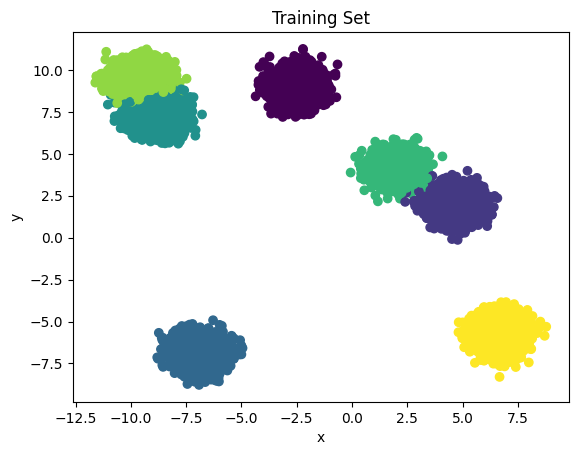

In [9]:
plt.scatter(
    x = X_train[:,0],
    y = X_train[:,1],
    c= y_train
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Set")
plt.show()

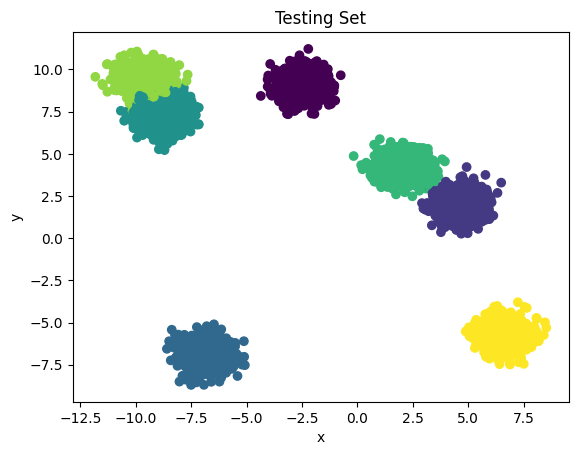

In [10]:
plt.scatter(
    x = X_test[:, 0],
    y = X_test[:,1],
    c= y_test
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Testing Set")
plt.show()

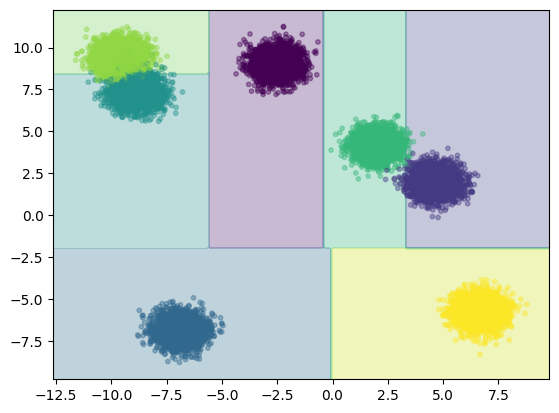

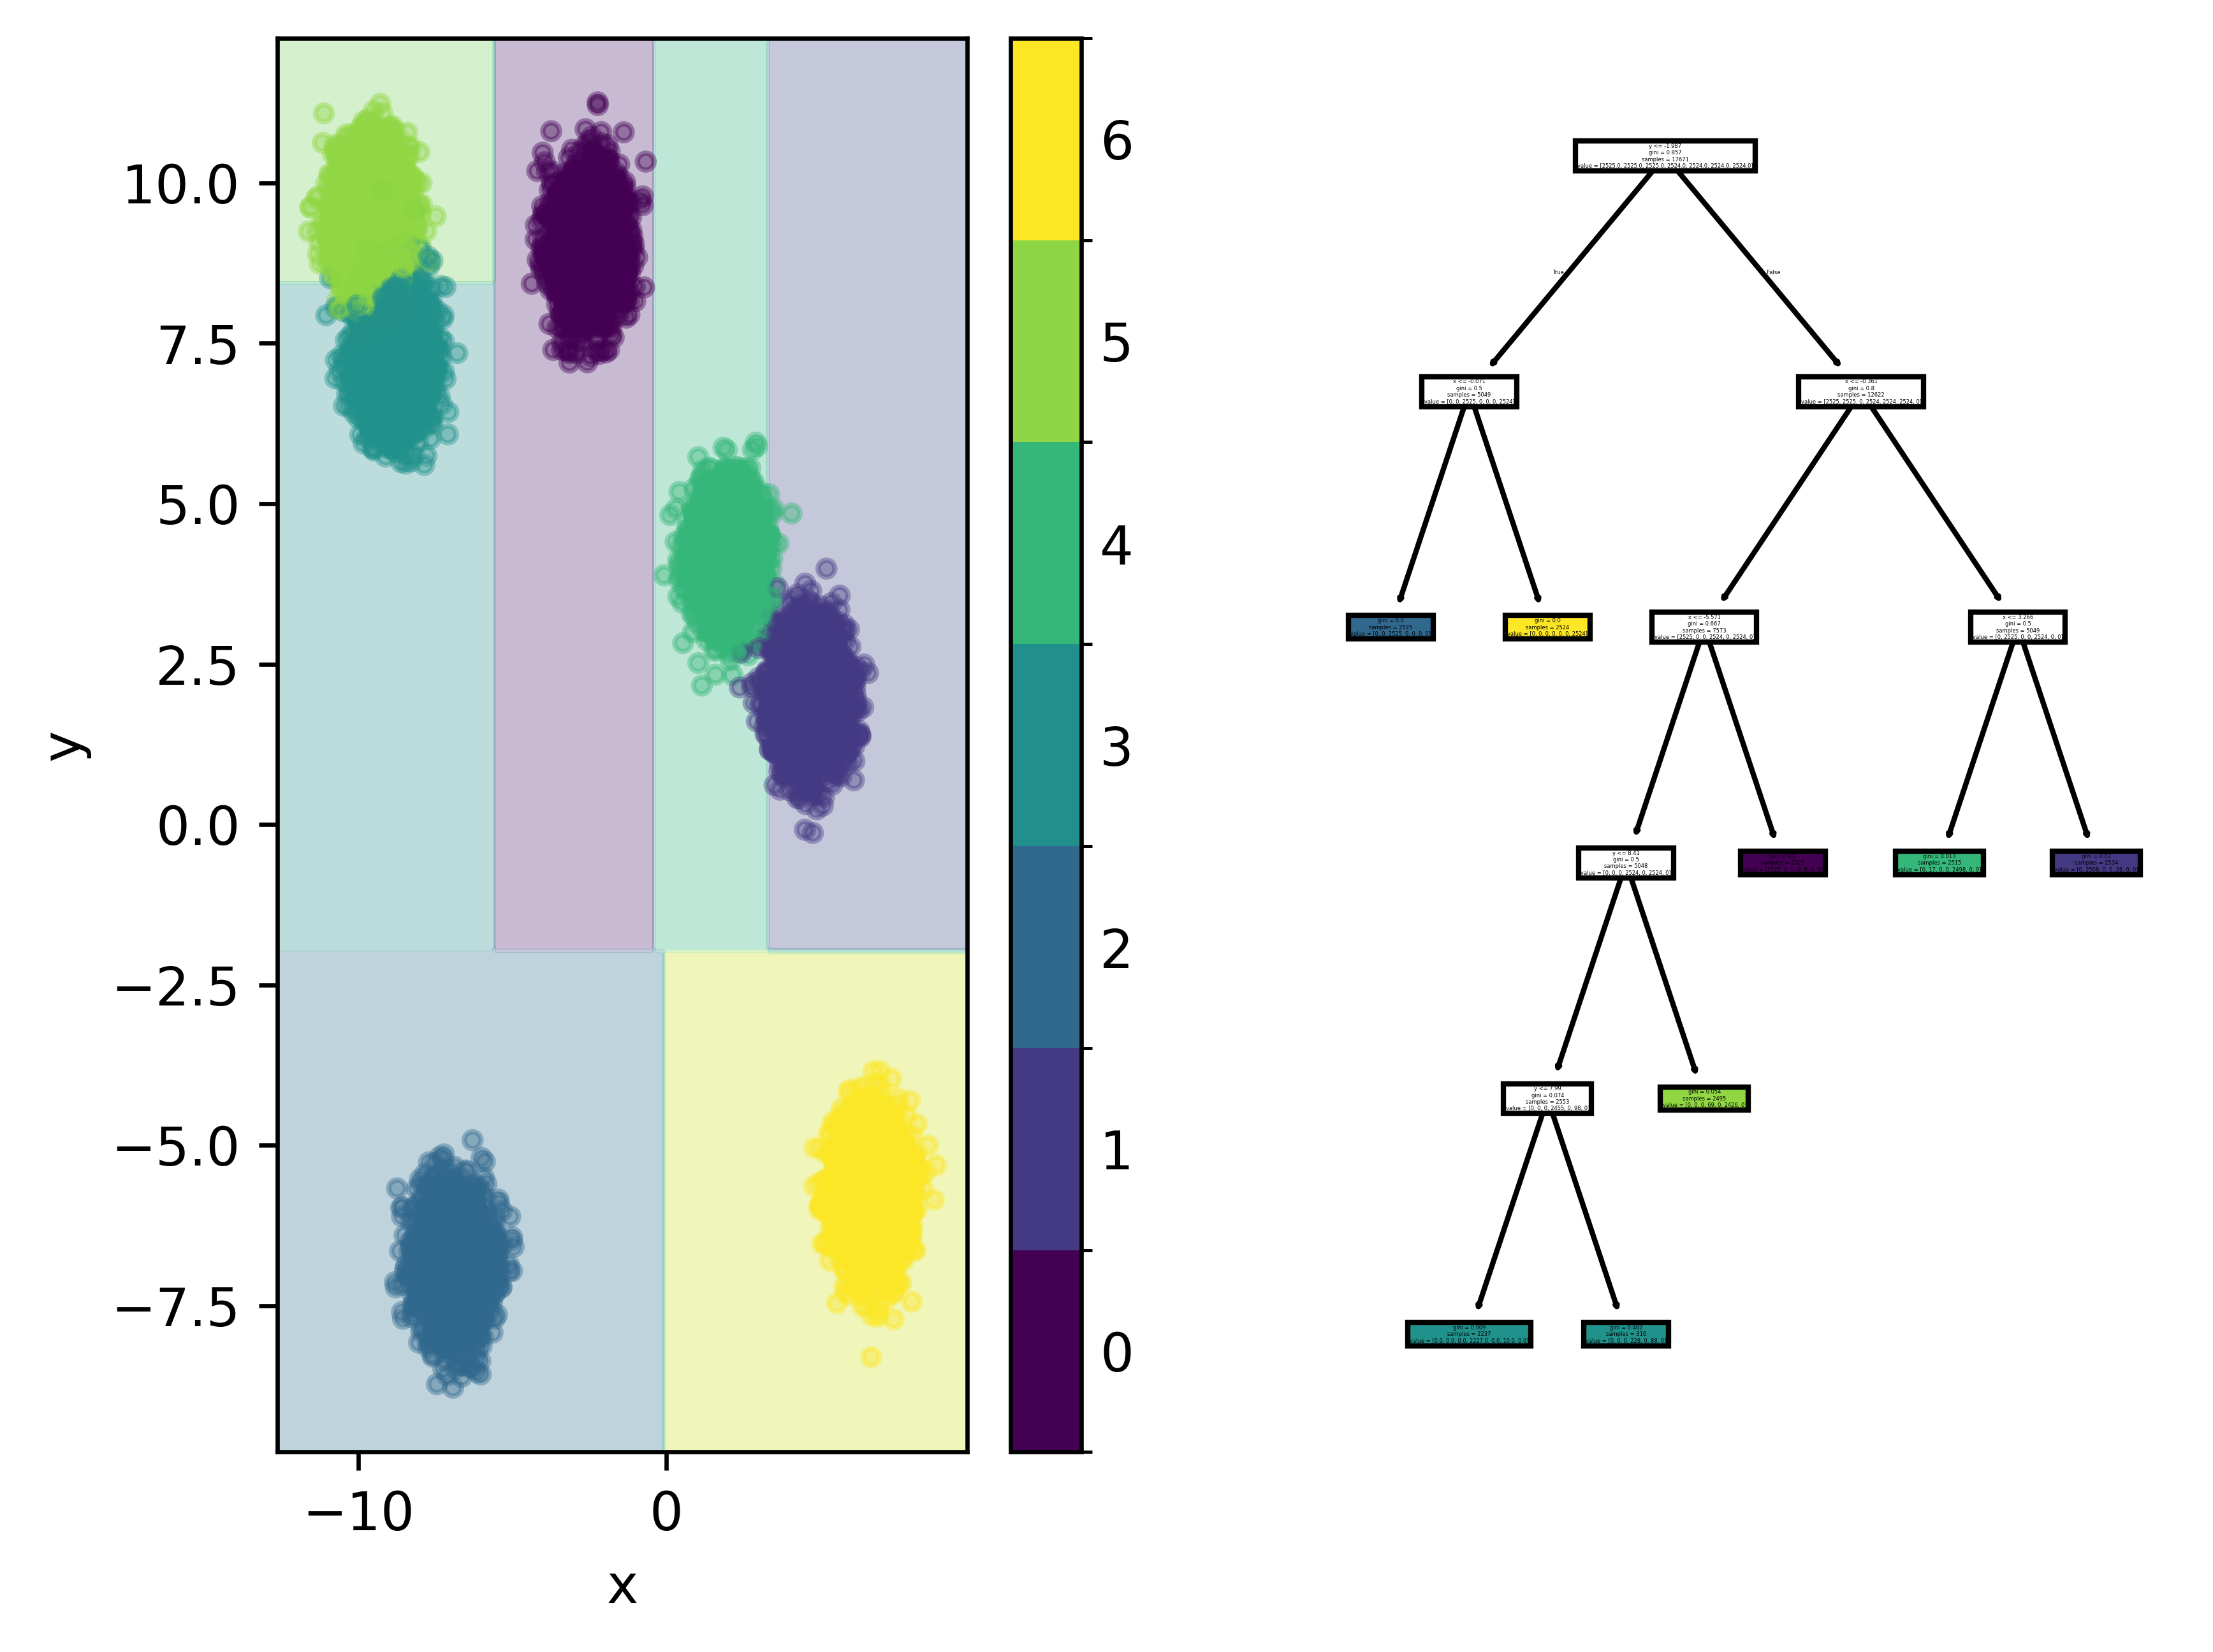

In [ ]:
test_clf = DecisionTreeClassifier(
    max_depth=5, 
    max_leaf_nodes=8
)
visualize_tree(test_clf, X_train, y_train, boundaries = False)

In [ ]:
plot_with_tree(test_clf, X_train, y_train, boundaries=True,
               X_test=X_test, y_test=y_test)

In [ ]:
train_score = test_clf.score(X_train, y_train)
print(f"training score: {(train_score * 100):.2f}%")
test_score = test_clf.score(X_test, y_test)
print(f"testing score: {(test_score * 100):.2f}%")

training score: 98.811612%
testing score: 98.848878%


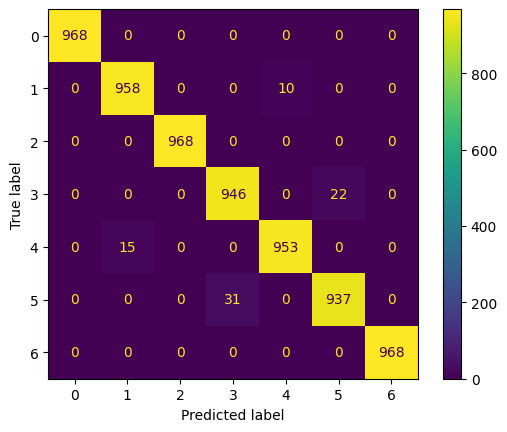

In [13]:
ConfusionMatrixDisplay.from_estimator(test_clf, X_test, y_test)
plt.show()

---

# Bad Classifiers

- **Underfitting**: the AI model is too simple to identify intricate patterns, leading to very bad scores on both the training and testing data.

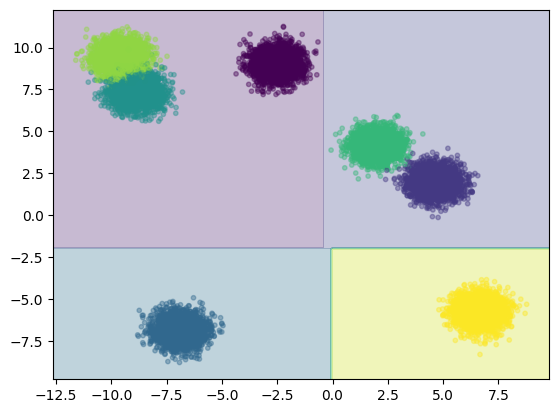

In [14]:
underfit_clf = DecisionTreeClassifier(
    max_depth=2
)

visualize_tree(underfit_clf, X_train, y_train, boundaries=False)

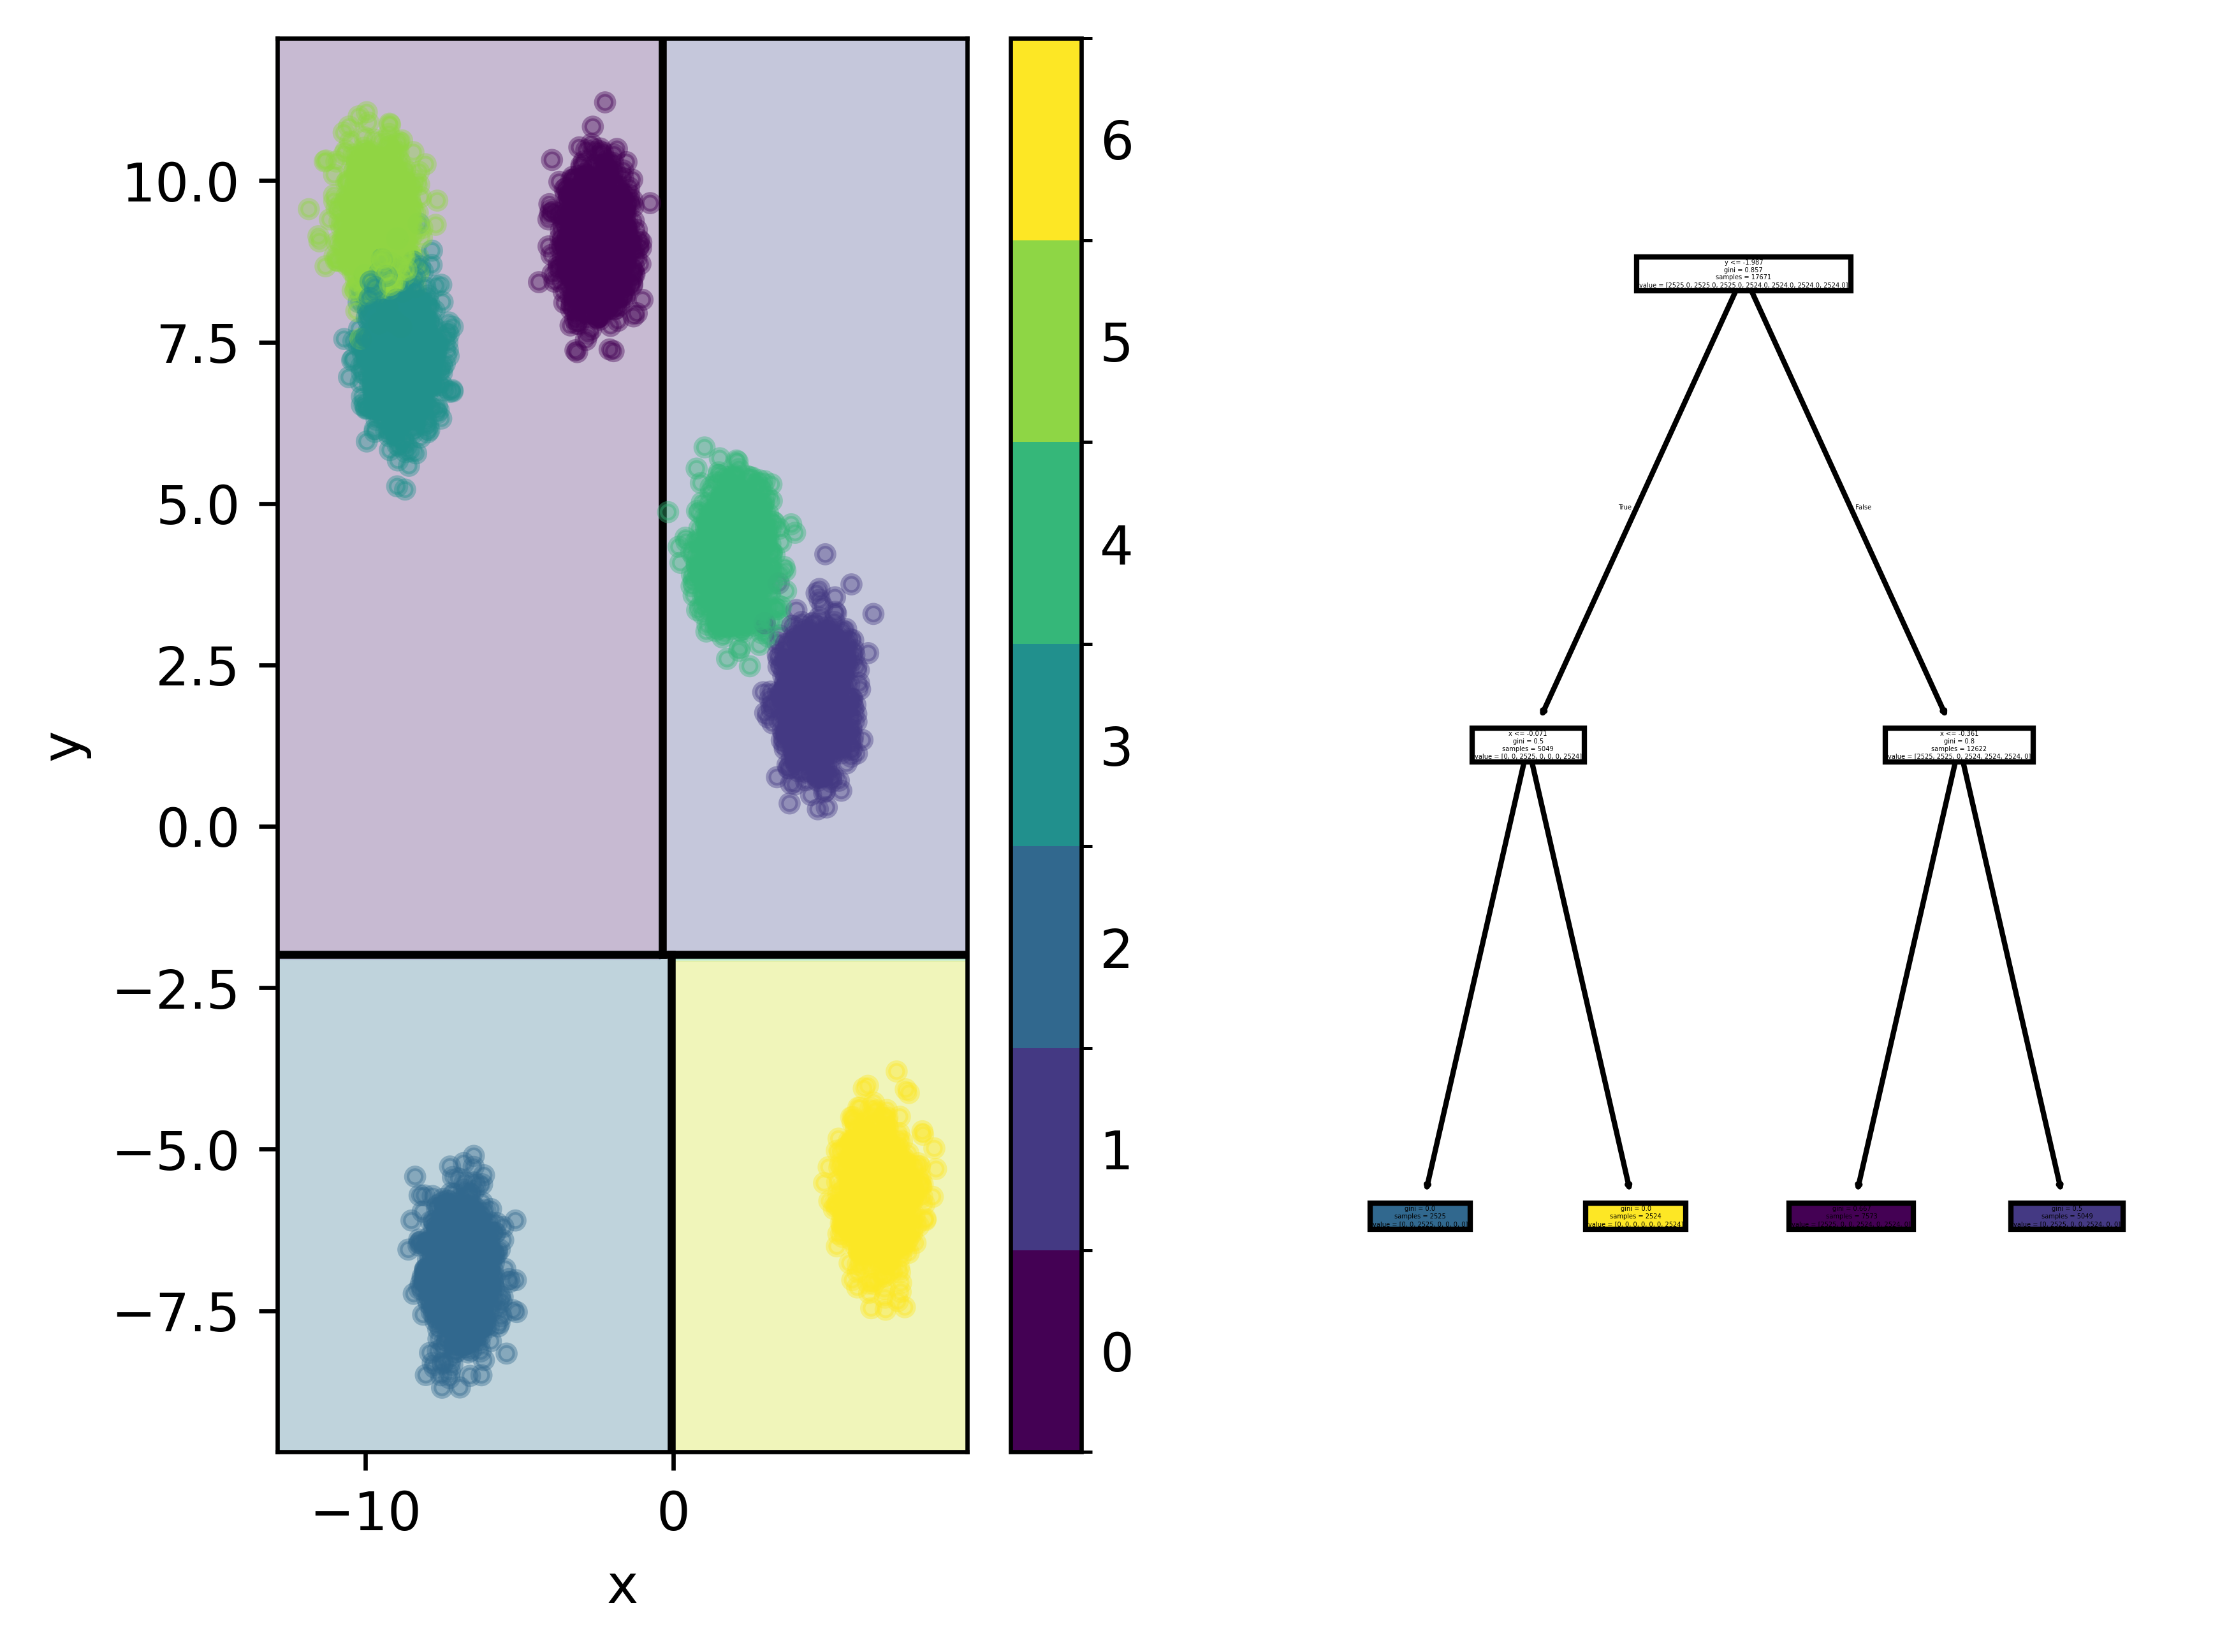

In [15]:
plot_with_tree(underfit_clf, X_train, y_train, boundaries=True, X_test=X_test, y_test=y_test)

In [ ]:
underfit_score = underfit_clf.score(X_train, y_train)
print(f"Training score: {(underfit_score*100):.2f}")
underfit_score_test = underfit_clf.score(X_test, y_test)
print(f"Testing score: {(underfit_score_test*100):.2f}")

Training score: 0.5715013298624866
Testing score: 0.5714285714285714


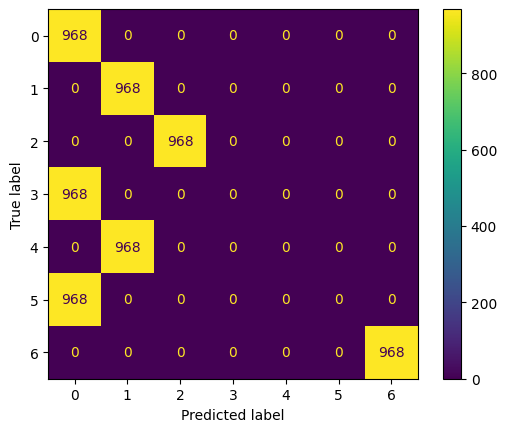

In [17]:
ConfusionMatrixDisplay.from_estimator(underfit_clf, X_test, y_test)
plt.show()

- **Overfitting**: when the model is too good on the training set; it is too complicated, only remembering the details from the training set, not being adapted to new data.

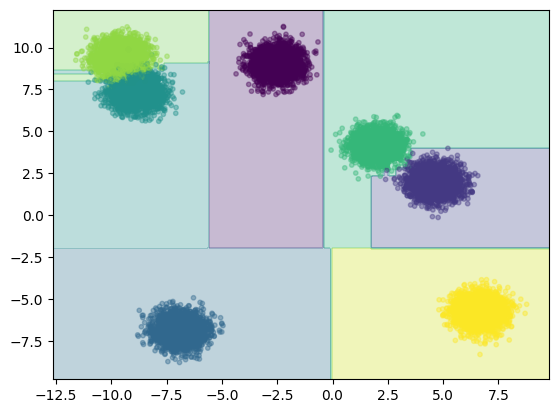

In [18]:
overfit_clf = DecisionTreeClassifier(
    max_depth=100
)

visualize_tree(overfit_clf, X_train, y_train, boundaries=False)

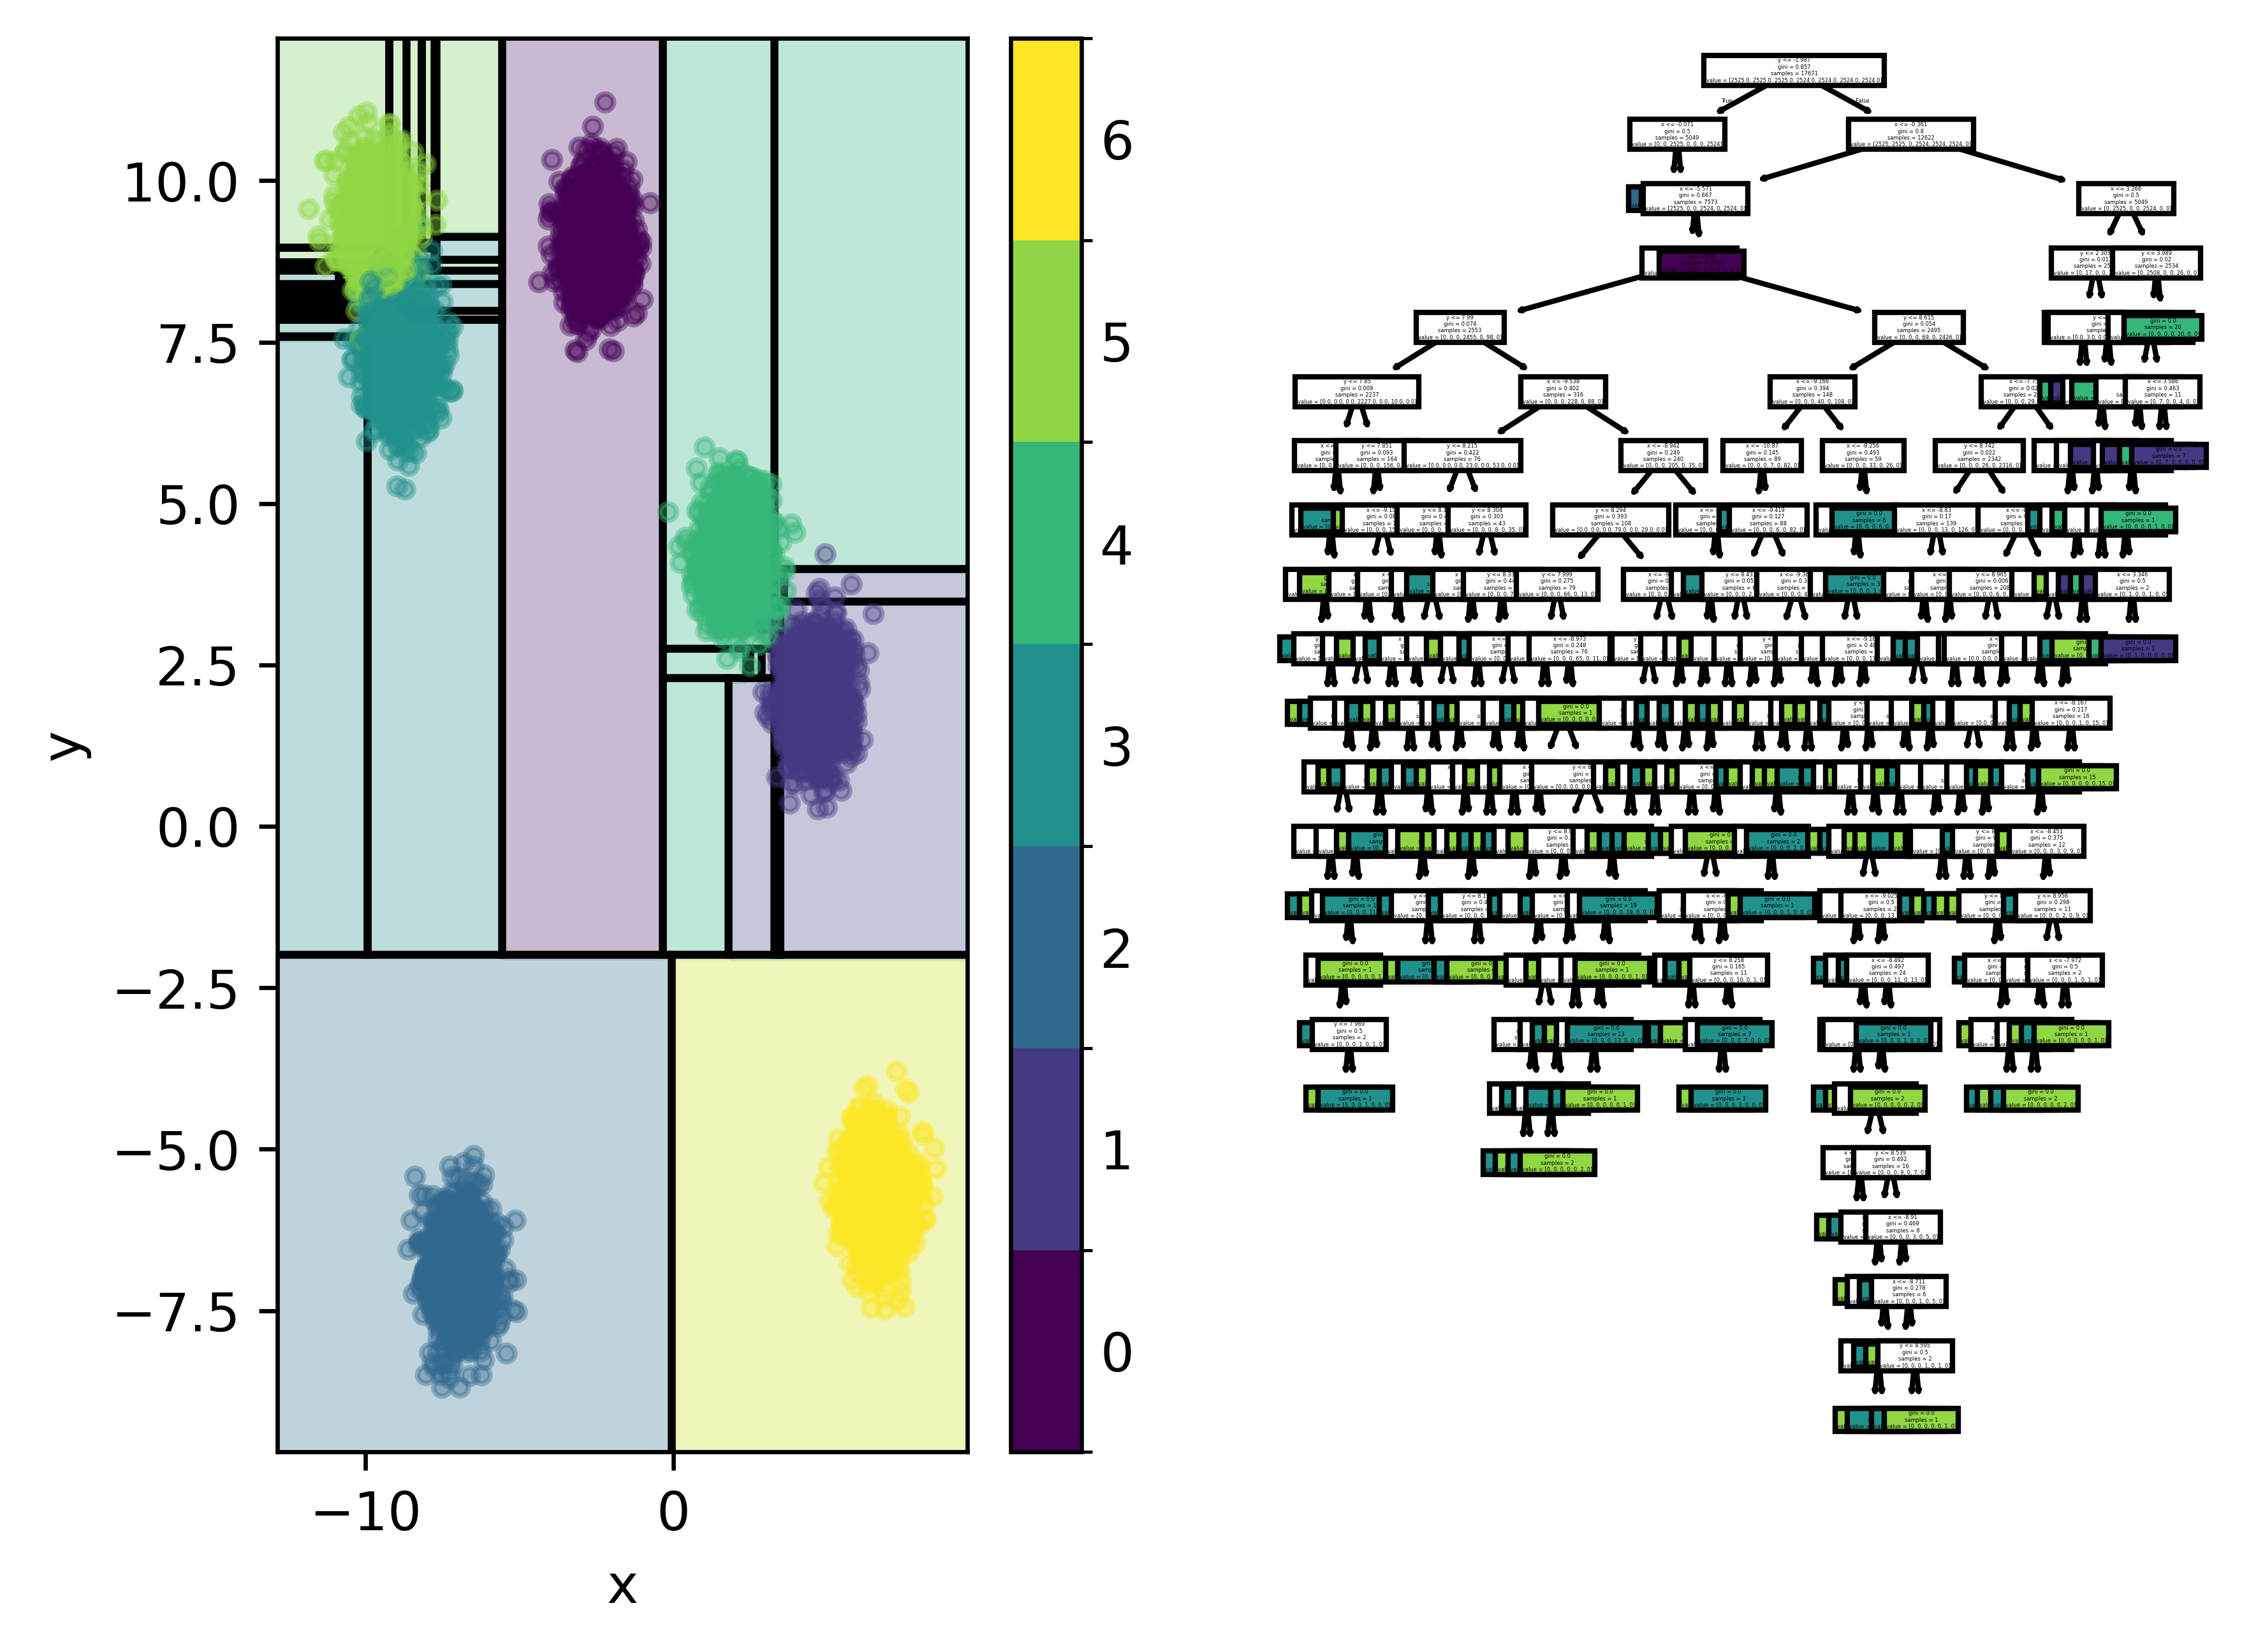

In [19]:
plot_with_tree(overfit_clf, X_train, y_train, boundaries=True, X_test=X_test, y_test=y_test)

In [ ]:
overfit_score = overfit_clf.score(X_train, y_train)
print(f"Training score: {(overfit_score*100):.2f}%")
overfit_score_test = overfit_clf.score(X_test, y_test)
print(f"Testing score: {(overfit_score_test*100):.2f}%")

Training score: 1.0
Testing score: 0.9873081463990555


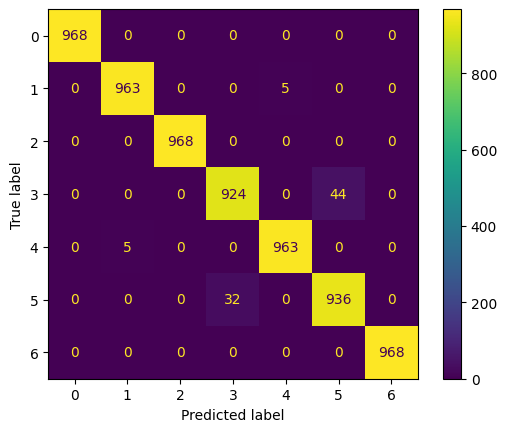

In [21]:
ConfusionMatrixDisplay.from_estimator(overfit_clf, X_test, y_test)
plt.show()